In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Minimum Wage Data.csv", encoding = "latin")

In [3]:
df.to_csv("minwage.csv", encoding = "utf-8")

# The operation above is perfomed because our original dataset was not in utf-8 so, we read it in latin encoding which is closest to utf-8 and then converted it back to utf-8 

In [4]:
df = pd.read_csv("minwage.csv")

In [5]:
df.head(3)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00,0.000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10,2.100,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.468,34.783333,4.75,3.37


# What we want to do is to make a new dataFrame with the low values of each state for every year. That means the coloumn header will be the state name and row values will be the Low.2018, we can do it in the similar way like we did with Avocado in the previous notebook, but we will do it in a more elegant Pandas way

In [6]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby("State"):
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018" : name})
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018" : name}))
    
act_min_wage.head()    

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


## A quick way to get some meta information about our dataset

In [7]:
act_min_wage.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [8]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


# We can see in the above table that some states have zero LOW value, this can be due to human error while making the dataset. What we will do is see if any state doesn't have a low value throughout all the years we will drop them and do the analysis on the remaining states.

In [9]:
issue_df = df[df["Low.2018"] == 0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [10]:
issue_df["State"].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

### The above array are the states with no Low minimum wage value. 

# We will now replace all the missing value with nan and then address the issue of removing it.

In [11]:
import numpy as np

act_min_wage.replace(0, np.NAN).dropna(axis=1).head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,15.12,1.12,11.88,7.20,10.08,9.00,9.00,8.28,9.00,9.00,...,8.28,3.10,10.08,3.06,7.20,10.08,11.52,7.20,9.00,8.64
1969,14.33,1.07,11.26,6.83,9.56,8.53,8.53,7.85,8.53,8.53,...,7.85,2.94,9.56,2.90,6.83,9.56,10.92,6.83,8.53,8.19
1970,13.54,7.09,10.64,6.45,10.32,8.06,10.32,8.38,10.32,10.32,...,8.38,2.77,10.32,6.45,6.45,10.32,10.32,6.45,8.38,8.38
1971,12.99,6.80,10.20,6.18,9.89,7.73,9.89,8.04,9.89,9.89,...,8.04,2.66,9.89,6.18,6.18,9.89,9.89,6.18,8.04,8.04
1972,12.57,7.19,9.88,5.99,11.08,9.58,9.58,9.58,11.38,9.58,...,9.58,3.89,9.58,5.99,7.19,9.58,9.58,7.19,8.68,8.98


# To check the scenario where it might be possible that one state had no minimum wage in earlier days but later minimum wage was introduced.

In [12]:
min_wage_corr = act_min_wage.replace(0, np.NAN).dropna(axis=1).corr()

for problem in issue_df["State"].unique():
    if problem in min_wage_corr.columns:
        print("Something is missing here..")

In [13]:
grouped_issues = issue_df.groupby("State")

In [14]:
grouped_issues.get_group("Alabama")['Low.2018'].sum()

0.0

# as we can see for Alabama we never had any value so we can remove it.

In [15]:
for state, data in grouped_issues:
    if data['Low.2018'].sum() != 0.0:
        print("We misss something")

# We can see that it never prints anything that means none of the state ever had any value/

# We will make a correlation table from the dataset and then visualize it.

In [16]:
min_wage_corr.head()

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971


In [17]:
import matplotlib.pyplot as plt

plt.matshow(min_wage_corr)

# The heatmap above is not meaningful as the labels are numbers we will address this by customizing matplotlib

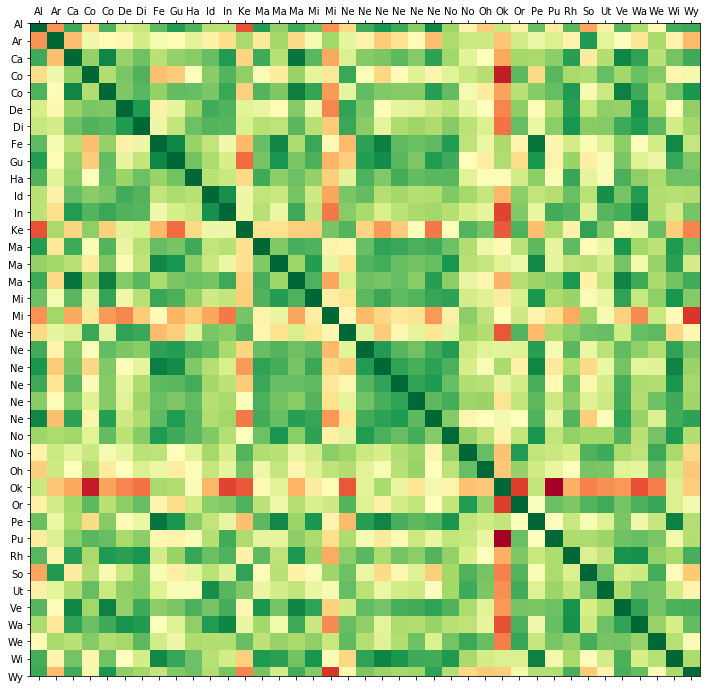

In [18]:
labels = [c[:2] for c in min_wage_corr.columns]

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

plt.show()

# The second issue to now address in repeating labels in abbreviated name, so we will fetch official abbreviations from the internet. 

In [19]:
dfs = pd.read_html("https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes")

In [20]:
dfs

[          State/District Abbreviation Postal Code
 0                Alabama         Ala.          AL
 1                 Alaska       Alaska          AK
 2                Arizona        Ariz.          AZ
 3               Arkansas         Ark.          AR
 4             California       Calif.          CA
 5               Colorado        Colo.          CO
 6            Connecticut        Conn.          CT
 7               Delaware         Del.          DE
 8   District of Columbia         D.C.          DC
 9                Florida         Fla.          FL
 10               Georgia          Ga.          GA
 11                Hawaii       Hawaii          HI
 12                 Idaho        Idaho          ID
 13              Illinois         Ill.          IL
 14               Indiana         Ind.          IN
 15                  Iowa         Iowa          IA
 16                Kansas        Kans.          KS
 17              Kentucky          Ky.          KY
 18             Louisiana      

In [21]:
state_abbv = dfs[0]

In [22]:
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


## Now, we can use this dataFrame to store in a csv and then convert to a dict to map to a column

In [23]:
state_abbv.to_csv("state_abbv.csv", index = False)

# We did index  = False because it already have an index and if don't set it to false it will add an index everytime we save or read the csv

In [24]:
state_abbv = pd.read_csv("state_abbv.csv")

In [25]:
state_abbv.head()

,State/District,Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [26]:
state_abbv.set_index("State/District", inplace = True)

state_abbv.head()

,Abbreviation,Postal Code
State/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA


In [27]:
state_abbv = state_abbv.drop(columns = "Abbreviation")

state_abbv.head()

,Postal Code
State/District,
Alabama,AL
Alaska,AK
Arizona,AZ
Arkansas,AR
California,CA


In [28]:
abbv_dict = state_abbv.to_dict()

In [29]:
abbv_dict

{'Postal Code': {'Alabama': 'AL',
  'Alaska': 'AK',
  'Arizona': 'AZ',
  'Arkansas': 'AR',
  'California': 'CA',
  'Colorado': 'CO',
  'Connecticut': 'CT',
  'Delaware': 'DE',
  'District of Columbia': 'DC',
  'Florida': 'FL',
  'Georgia': 'GA',
  'Hawaii': 'HI',
  'Idaho': 'ID',
  'Illinois': 'IL',
  'Indiana': 'IN',
  'Iowa': 'IA',
  'Kansas': 'KS',
  'Kentucky': 'KY',
  'Louisiana': 'LA',
  'Maine': 'ME',
  'Maryland': 'MD',
  'Massachusetts': 'MA',
  'Michigan': 'MI',
  'Minnesota': 'MN',
  'Mississippi': 'MS',
  'Missouri': 'MO',
  'Montana': 'MT',
  'Nebraska': 'NE',
  'Nevada': 'NV',
  'New Hampshire': 'NH',
  'New Jersey': 'NJ',
  'New Mexico': 'NM',
  'New York': 'NY',
  'North Carolina': 'NC',
  'North Dakota': 'ND',
  'Ohio': 'OH',
  'Oklahoma': 'OK',
  'Oregon': 'OR',
  'Pennsylvania': 'PA',
  'Rhode Island': 'RI',
  'South Carolina': 'SC',
  'South Dakota': 'SD',
  'Tennessee': 'TN',
  'Texas': 'TX',
  'Utah': 'UT',
  'Vermont': 'VT',
  'Virginia': 'VA',
  'Washington': 'W

In [30]:
abbv_dict = abbv_dict["Postal Code"]

In [31]:
abbv_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

## Importing some other datasets and finding correlation. One dataset is unemployment rate and the second is presidential vote

In [32]:
unemp_county = pd.read_csv("unemployment-by-county-us/output.csv")
unemp_county.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [33]:
def get_min_wage(year, state):
    try:
        return act_min_wage.loc[year][state]
    except:
        return np.NaN

In [34]:
%%time
# time will give us the total time to perform some cell's operation.

unemp_county['min_wage'] = list(map(get_min_wage, unemp_county['Year'], unemp_county['State']))

CPU times: user 1min 44s, sys: 822 ms, total: 1min 45s
Wall time: 1min 45s


In [35]:
unemp_county[['Rate','min_wage']].corr()

,Rate,min_wage
Rate,1.000000,-0.084186
min_wage,-0.084186,1.000000


In [36]:
unemp_county[['Rate','min_wage']].cov()

,Rate,min_wage
Rate,9.687873,-0.689465
min_wage,-0.689465,6.923306


In [38]:
pres16 = pd.read_csv("pres16results.csv")
pres16.head(15)

,county,fips,cand,st,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump
5,NaN,US,Darrell Castle,US,0.9951,180877.0,127592176.0,0.001418,Donald Trump
6,NaN,US,Gloria La Riva,US,0.9951,48308.0,127592176.0,0.000379,Donald Trump
7,NaN,US,Rocky De La Fuente,US,0.9951,32120.0,127592176.0,0.000252,Donald Trump
8,NaN,US,None of these candidates,US,0.9951,28824.0,127592176.0,0.000226,Donald Trump
9,NaN,US,Richard Duncan,US,0.9951,23501.0,127592176.0,0.000184,Donald Trump


In [42]:
county_2015 = unemp_county.copy()[(unemp_county['Year']==2015) & (unemp_county["Month"]=="February")]

In [43]:
county_2015['State'] = county_2015['State'].map(abbv_dict)

In [44]:
county_2015.tail()

,Year,Month,State,County,Rate,min_wage
2797,2015,February,ME,Somerset County,8.4,7.92
2798,2015,February,ME,Oxford County,6.8,7.92
2799,2015,February,ME,Knox County,6.1,7.92
2800,2015,February,ME,Piscataquis County,7.0,7.92
2801,2015,February,ME,Aroostook County,7.2,7.92


In [45]:
pres16.rename(columns={"county": "County", "st": "State"}, inplace=True)
pres16.head()

,County,fips,cand,State,pct_report,votes,total_votes,pct,lead
0,NaN,US,Donald Trump,US,0.9951,60350241.0,127592176.0,0.472993,Donald Trump
1,NaN,US,Hillary Clinton,US,0.9951,60981118.0,127592176.0,0.477938,Donald Trump
2,NaN,US,Gary Johnson,US,0.9951,4164589.0,127592176.0,0.032640,Donald Trump
3,NaN,US,Jill Stein,US,0.9951,1255968.0,127592176.0,0.009844,Donald Trump
4,NaN,US,Evan McMullin,US,0.9951,451636.0,127592176.0,0.003540,Donald Trump


In [46]:
for df in [county_2015, pres16]:
    df.set_index(["County", "State"], inplace=True)

In [47]:
pres16 = pres16[pres16['cand']=="Donald Trump"]
pres16 = pres16[['pct']]
pres16.dropna(inplace=True)
pres16.head(2)


pct
County State          
NaN    US     0.472993
       CA     0.330641

In [48]:
all_together = county_2015.merge(pres16, on=["County", "State"])
all_together.dropna(inplace=True)
all_together.drop("Year", axis=1, inplace=True)
all_together.head()

,,Month,Rate,min_wage,pct
County,State,,,,
Newton County,MS,February,6.1,0.0,0.689900
Panola County,MS,February,9.4,0.0,0.496230
Monroe County,MS,February,7.9,0.0,0.640454
Hinds County,MS,February,6.1,0.0,0.272232
Kemper County,MS,February,10.6,0.0,0.383272


In [49]:
all_together.corr()

,Rate,min_wage,pct
Rate,1.000000,-0.143714,-0.195986
min_wage,-0.143714,1.000000,-0.076527
pct,-0.195986,-0.076527,1.000000


In [ ]:
all_together